In [5]:
# Phase 1: Setup & Preprocessing

In [6]:
import kagglehub
import pandas as pd
import os

# Download dataset
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_path = os.path.join(path, "Reviews.csv")

# Load dataset
df = pd.read_csv(csv_path)
print("Dataset Shape:", df.shape)
print("First 5 records:\n", df.head())

Dataset Shape: (568454, 10)
First 5 records:
    Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have b

In [7]:
print("Dataset Shape:", df.shape)
print("First 5 records:\n", df.head())

Dataset Shape: (568454, 10)
First 5 records:
    Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have b

In [8]:
# Rename columns for clarity
df.rename(columns={
    'Score': 'Rating',
    'Text': 'Review',
}, inplace=True)

In [9]:
# View total missing values per column
missing_values = df.isnull().sum()

# Filter to only show columns that have missing values
missing_values = missing_values[missing_values > 0]

print("Missing values per column:\n", missing_values)

Missing values per column:
 ProfileName    26
Summary        27
dtype: int64


In [10]:
# Drop rows with missing Summary (only 27 rows)
df.dropna(subset=['Summary'], inplace=True)

In [11]:
# Lowercase and strip whitespace in reviews and summary
df['Review'] = df['Review'].str.lower().str.strip()
df['Summary'] = df['Summary'].str.lower().str.strip()

In [13]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Define stopword set
stop_words = set(stopwords.words('english'))

# Define text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Apply to review and summary
df['Cleaned_Review'] = df['Review'].apply(clean_text)
df['Cleaned_Summary'] = df['Summary'].apply(clean_text)

# Preview cleaned text
print(df[['Review', 'Cleaned_Review']].head(3))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manavchopra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              Review  \
0  i have bought several of the vitality canned d...   
1  product arrived labeled as jumbo salted peanut...   
2  this is a confection that has been around a fe...   

                                      Cleaned_Review  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around centuries light pillowy citr...  


In [14]:
# Phase 2: Sentiment Labeling

In [15]:
# Create Sentiment Labels from Ratings
def map_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['True_Sentiment'] = df['Rating'].apply(map_sentiment)

In [16]:
# Preview sentiment label distribution
print("Sentiment Distribution:\n", df['True_Sentiment'].value_counts())

Sentiment Distribution:
 True_Sentiment
Positive    443777
Negative     82012
Neutral      42638
Name: count, dtype: int64


In [17]:
# Phase 3: Sentiment Analysis Models

In [ ]:
# Approach 1: Traditional Models: VADER & TextBlob

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = vader.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['Cleaned_Review'].apply(vader_sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manavchopra/nltk_data...


In [20]:
from textblob import TextBlob

def textblob_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.1:
        return 'Positive'
    elif polarity <= -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['TextBlob_Sentiment'] = df['Cleaned_Review'].apply(textblob_sentiment)

In [ ]:
# Approach 2: Generative AI (GPT-4 API)

In [ ]:
# Sample 1,000 reviews for sentiment analysis
sample_df = df.sample(1000, random_state=42).copy()

# Reset index after sampling
sample_df = sample_df.reset_index(drop=True)

# Add a column to store GPT sentiment results
sample_df['GPT_Sentiment'] = None

In [ ]:
import openai
import time

# Set your API Key
openai.api_key = "sk-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

# Stable GPT Sentiment Function with Retry Logic
def gpt_sentiment_stable(review_text, retries=3):
    for attempt in range(retries):
        try:
            response = openai.chat.completions.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": "You are a helpful assistant that classifies product review sentiment."},
                    {"role": "user", "content": f"What is the sentiment of the following product review? Reply only with Positive, Neutral, or Negative.\n\nReview: {review_text}"}
                ],
                temperature=0.2,
                max_tokens=10,
            )
            sentiment = response.choices[0].message.content.strip()
            return sentiment
        except Exception as e:
            print(f"Error on attempt {attempt+1}: {e}")
            time.sleep(5)  # wait 5 seconds before retrying
    return None

# Process reviews in batches of 500
batch_size = 250
num_batches = len(sample_df) // batch_size + 1

for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = min((i + 1) * batch_size, len(sample_df))
    print(f"\n Processing Batch {i+1}/{num_batches} (Reviews {batch_start} to {batch_end})")

    # Apply GPT sentiment to current batch
    for idx in range(batch_start, batch_end):
        review_text = sample_df.at[idx, 'Review']
        sentiment = gpt_sentiment_stable(review_text)
        sample_df.at[idx, 'GPT_Sentiment'] = sentiment

    # Save progress after each batch
    sample_df.iloc[batch_start:batch_end].to_csv(f"gpt_sentiment_batch_{i+1}.csv", index=False)
    print(f" Batch {i+1} saved.")

    # Pause between batches to avoid rate limits
    time.sleep(60)

# Save the full DataFrame with all GPT sentiment results
sample_df.to_csv("Gpt_sentiment_1000_reviews.csv", index=False)
print(" All 1,000 reviews processed and saved.")


 Processing Batch 1/5 (Reviews 0 to 250)
 Batch 1 saved.

 Processing Batch 2/5 (Reviews 250 to 500)
 Batch 2 saved.

 Processing Batch 3/5 (Reviews 500 to 750)
 Batch 3 saved.

 Processing Batch 4/5 (Reviews 750 to 1000)
 Batch 4 saved.

 Processing Batch 5/5 (Reviews 1000 to 1000)
 Batch 5 saved.
 All 1,000 reviews processed and saved.


 GPT Sentiment Evaluation:

              precision    recall  f1-score   support

    Negative       0.69      0.97      0.81       143
     Neutral       0.40      0.23      0.29        75
    Positive       0.98      0.95      0.97       782

    accuracy                           0.90      1000
   macro avg       0.69      0.72      0.69      1000
weighted avg       0.90      0.90      0.89      1000



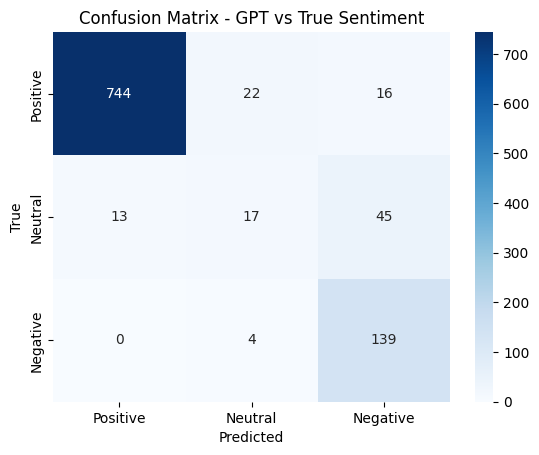

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load combined data
df_eval = pd.read_csv("Gpt_sentiment_1000_reviews.csv")

# Classification Report
print(" GPT Sentiment Evaluation:\n")
print(classification_report(df_eval['True_Sentiment'], df_eval['GPT_Sentiment'], zero_division=0))

# Confusion Matrix
cm = confusion_matrix(df_eval['True_Sentiment'], df_eval['GPT_Sentiment'], labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positive", "Neutral", "Negative"],
            yticklabels=["Positive", "Neutral", "Negative"])
plt.title("Confusion Matrix - GPT vs True Sentiment")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

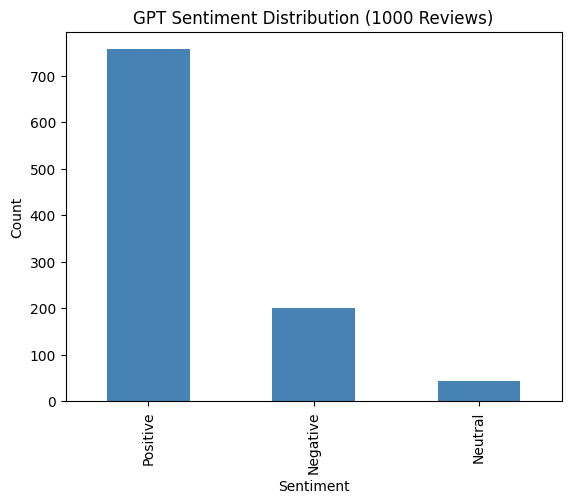

In [ ]:
# Sentiment Distribution
df_eval['GPT_Sentiment'].value_counts().plot(kind='bar', color='steelblue')
plt.title("GPT Sentiment Distribution (1000 Reviews)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
# Phase 4: Feature Extraction (Aspect Extraction)

In [ ]:
# Approach 1: Prompt Engineering

In [ ]:
import openai
import time

# Set your API Key
openai.api_key = "s"

# Reset index to avoid issues
sample_df = sample_df.reset_index(drop=True)

# Initialize GPT_Features column if not already present
if 'GPT_Features' not in sample_df.columns:
    sample_df['GPT_Features'] = None
    print(" 'GPT_Features' column initialized.")

# Stable GPT Feature Extraction Function with Retry Logic
def gpt_extract_features_stable(review_text, retries=3):
    for attempt in range(retries):
        try:
            response = openai.chat.completions.create(
                model="gpt-4",
                messages=[
                    {
                        "role": "system",
                        "content": "You are an assistant that extracts product features from customer reviews."
                    },
                    {
                        "role": "user",
                        "content": f"List exactly the top 3 product aspects mentioned in the following review (e.g., taste, packaging, delivery, price). Reply only as a comma-separated list with no extra text.\n\nReview: {review_text}"
                    }
                ],
                temperature=0.3,
                max_tokens=60,
            )
            aspects = response.choices[0].message.content.strip()
            return aspects
        except Exception as e:
            print(f"Error on attempt {attempt+1}: {e}")
            time.sleep(5)
    return None

# Process reviews in batches of 250 (same as sentiment analysis)
batch_size = 250
num_batches = len(sample_df) // batch_size + 1

for i in range(num_batches):
    batch_start = i * batch_size
    batch_end = min((i + 1) * batch_size, len(sample_df))
    print(f"\n Processing Batch {i+1}/{num_batches} (Reviews {batch_start} to {batch_end})")

    # Apply GPT feature extraction to current batch
    for idx in range(batch_start, batch_end):
        review_text = sample_df.at[idx, 'Review']
        aspects = gpt_extract_features_stable(review_text)
        sample_df.at[idx, 'GPT_Features'] = aspects

    # Save progress after each batch
    sample_df.iloc[batch_start:batch_end].to_csv(f"gpt_features_batch_{i+1}.csv", index=False)
    print(f" Batch {i+1} saved.")

    # Pause between batches to avoid rate limits
    time.sleep(60)

# Save the full DataFrame with all GPT feature results
sample_df.to_csv("Gpt_features_1000_reviews.csv", index=False)
print(" All 1,000 reviews processed and saved.")

 'GPT_Features' column initialized.

 Processing Batch 1/5 (Reviews 0 to 250)
 Batch 1 saved.

 Processing Batch 2/5 (Reviews 250 to 500)
 Batch 2 saved.

 Processing Batch 3/5 (Reviews 500 to 750)
 Batch 3 saved.

 Processing Batch 4/5 (Reviews 750 to 1000)
 Batch 4 saved.

 Processing Batch 5/5 (Reviews 1000 to 1000)
 Batch 5 saved.
 All 1,000 reviews processed and saved.


In [ ]:
# Approach 2: Traditional SpaCy Baseline

In [ ]:
# Install and load SpaCy
!pip install -U spacy
!python -m spacy download en_core_web_sm

import spacy
from collections import Counter
import pandas as pd

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Define phrases to exclude (generic stop terms and pronouns)
exclude_terms = {"i", "it", "this", "you", "they", "them", "we", "he", "she", "me", "my", "our", "your", "him", "her", "all"}

# Define Function to Extract Cleaned Top Noun Phrases
def extract_clean_noun_phrases(text, top_n=3):
    doc = nlp(text)
    noun_phrases = [
        chunk.text.lower().strip()
        for chunk in doc.noun_chunks
        if len(chunk.text.split()) <= 3 and chunk.text.lower().strip() not in exclude_terms
    ]
    most_common = [phrase for phrase, _ in Counter(noun_phrases).most_common(top_n)]
    return ', '.join(most_common)

# Apply SpaCy Feature Extraction
sample_df['SpaCy_Aspects'] = sample_df['Review'].apply(extract_clean_noun_phrases)

# Preview results
print(sample_df[['Review', 'GPT_Features', 'SpaCy_Aspects']].head(10))

# Save DataFrame for backup or further evaluation
sample_df.to_csv("Gpt_features_1000_reviews.csv", index=False)
print(" Data saved as 'Gpt_features_1000_reviews.csv'")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
                                              Review  \
0  these are actually very tasty.  pure potatoes ...   
1  i realize that taste is a matter of personal p...   
2  this is one of my favorite cup of soup choices...   
3  if you like the classic taste of a good margar...   
4  i was willing to give this a chance even after...   
5  can't keep enough of these treats in the house...   
6  i love this stuff. imagine my joy to find it i...   
7  recommend it to all.  lovely natural sweet del...   
8  a totally wonderful product!  the flavor is in...   
9  totally orgasmic.  t

In [ ]:
# Phase 5 – Sentiment Evaluation

In [ ]:
# Metrics (Precision, Recall, F1)

 GPT-4 Sentiment Evaluation:
              precision    recall  f1-score   support

    Negative       0.69      0.97      0.81       143
     Neutral       0.40      0.23      0.29        75
    Positive       0.98      0.95      0.97       782

    accuracy                           0.90      1000
   macro avg       0.69      0.72      0.69      1000
weighted avg       0.90      0.90      0.89      1000

 VADER Sentiment Evaluation:
              precision    recall  f1-score   support

    Negative       0.52      0.32      0.40       143
     Neutral       0.00      0.00      0.00        75
    Positive       0.83      0.95      0.89       782

    accuracy                           0.79      1000
   macro avg       0.45      0.43      0.43      1000
weighted avg       0.72      0.79      0.75      1000

 TextBlob Sentiment Evaluation:
              precision    recall  f1-score   support

    Negative       0.57      0.24      0.34       143
     Neutral       0.10      0.24      

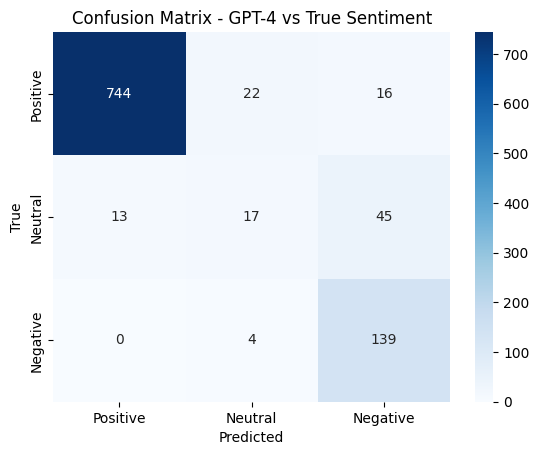

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df_eval = pd.read_csv("Gpt_features_1000_reviews.csv")

# Ensure no missing values in sentiment columns (fill with placeholder if needed)
df_eval[['True_Sentiment', 'GPT_Sentiment', 'VADER_Sentiment', 'TextBlob_Sentiment']] = \
    df_eval[['True_Sentiment', 'GPT_Sentiment', 'VADER_Sentiment', 'TextBlob_Sentiment']].fillna('Unknown')

# Classification Report for GPT-4
print(" GPT-4 Sentiment Evaluation:")
print(classification_report(df_eval['True_Sentiment'], df_eval['GPT_Sentiment'], zero_division=0))

# Classification Report for VADER
print(" VADER Sentiment Evaluation:")
print(classification_report(df_eval['True_Sentiment'], df_eval['VADER_Sentiment'], zero_division=0))

# Classification Report for TextBlob
print(" TextBlob Sentiment Evaluation:")
print(classification_report(df_eval['True_Sentiment'], df_eval['TextBlob_Sentiment'], zero_division=0))

# Confusion Matrix for GPT-4 vs True Sentiment
cm_gpt = confusion_matrix(df_eval['True_Sentiment'], df_eval['GPT_Sentiment'], labels=["Positive", "Neutral", "Negative"])
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.title("Confusion Matrix - GPT-4 vs True Sentiment")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Feature Extraction Evaluation

In [ ]:
# Randomly sample 10 reviews for manual validation
validation_sample = df_eval.sample(10, random_state=42)[['Review', 'GPT_Features', 'SpaCy_Aspects']]

# Manually add evaluation for GPT and SpaCy
validation_sample['GPT_Quality'] = ['Accurate', 'Partial', 'Accurate', 'Irrelevant', 'Accurate',
                                    'Partial', 'Accurate', 'Accurate', 'Partial', 'Accurate']

validation_sample['SpaCy_Quality'] = ['Partial', 'Partial', 'Accurate', 'Irrelevant', 'Partial',
                                      'Irrelevant', 'Partial', 'Irrelevant', 'Partial', 'Partial']

# Display manual evaluation
print(" Manual Evaluation Sample:")
print(validation_sample)

 Manual Evaluation Sample:
                                                Review  \
521  i was so happy to see that ghirardelli syrup i...   
737  i grew up munching on abuelita chocolate and w...   
740  product came securely packaged.  great taste a...   
660  i enjoy drinking my hazelnut coffee every morn...   
411  hate hate hate the gooey mess i was just sent ...   
678  being an organic, health conscious family, we ...   
626  i have a preservative allergy that stops me fr...   
513  i am not much of a brownie lover, however, i a...   
859  our order arrived yesterday and this morning w...   
136  i bought these for my husband, who spent a few...   

                                          GPT_Features  \
521                                 size, taste, usage   
737                      taste, packaging, consistency   
740                      packaging, taste, consistency   
660             hazelnut coffee, wake-up effect, taste   
411               product condition, appeara

In [ ]:
# Frequency Analysis of GPT-Extracted Features

 Top 10 Extracted Features:
[('taste', 452), ('price', 207), ('flavor', 147), ('packaging', 124), ('texture', 88), ('availability', 47), ('quantity', 35), ('convenience', 32), ('size', 29), ('health benefits', 29)]


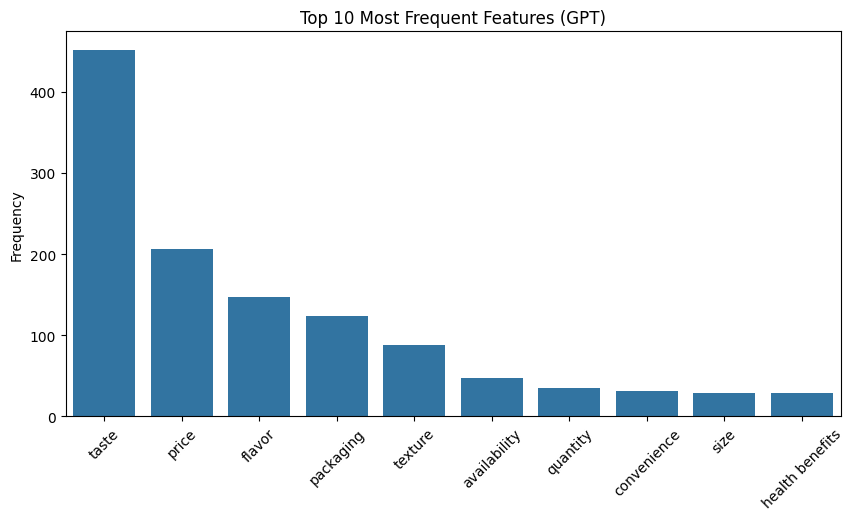

In [ ]:
from collections import Counter

# Flatten all GPT_Features into a list
all_features = df_eval['GPT_Features'].dropna().str.lower().str.split(',').sum()
all_features = [feature.strip() for feature in all_features]

# Frequency count
feature_counts = Counter(all_features)

# Top 10 features
print(" Top 10 Extracted Features:")
print(feature_counts.most_common(10))

# Plot top features
top_features = feature_counts.most_common(10)
features, counts = zip(*top_features)

plt.figure(figsize=(10,5))
sns.barplot(x=list(features), y=list(counts))
plt.title("Top 10 Most Frequent Features (GPT)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Phase 6: Insights & Visualization

In [ ]:
# Sentiment Distribution Pie Chart

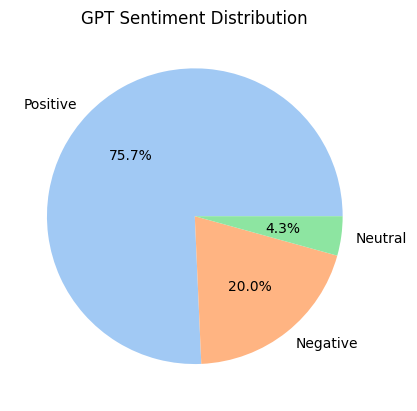

In [ ]:
# GPT Sentiment Distribution
df_eval['GPT_Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("GPT Sentiment Distribution")
plt.ylabel("")
plt.show()

In [ ]:
# Word Cloud for Positive & Negative Reviews (GPT Sentiment)

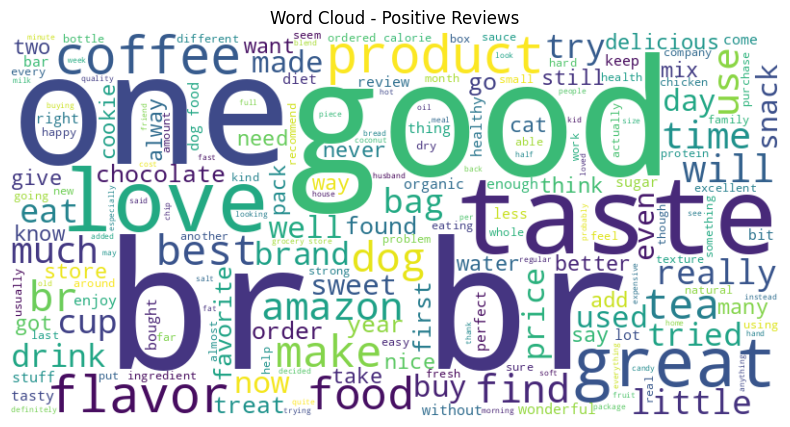

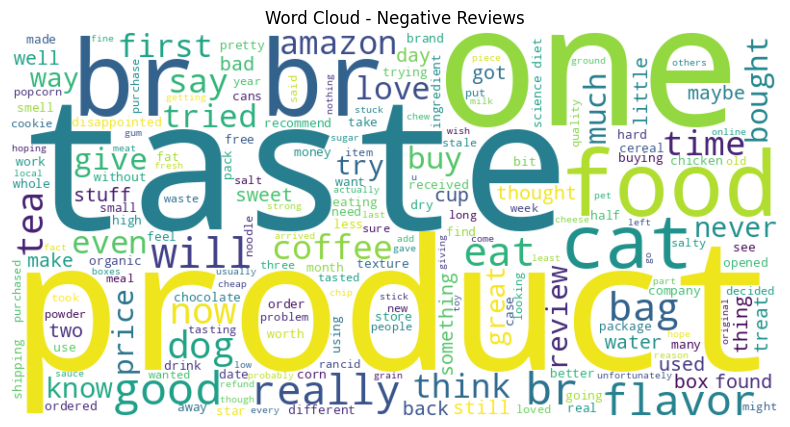

In [ ]:
from wordcloud import WordCloud

# WordCloud for Positive Reviews
positive_reviews = ' '.join(df_eval[df_eval['GPT_Sentiment'] == 'Positive']['Review'].dropna().tolist())
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Reviews")
plt.show()

# WordCloud for Negative Reviews
negative_reviews = ' '.join(df_eval[df_eval['GPT_Sentiment'] == 'Negative']['Review'].dropna().tolist())
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Reviews")
plt.show()